[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

# ARIMA Model with Python 

# Dataset
**Minimum Daily Temperatures Dataset**

Use the following dataset that describes the minimum daily temperatures over 10 years (1981-1990) in the city of Melbourne, Australia. The source of the data is credited as the Australian Bureau of Meteorology.
The units are in degrees Celsius and there are 3,650 observations. 

Download the dataset here:  https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv

**Load the dataset and create a line plot of the time series**

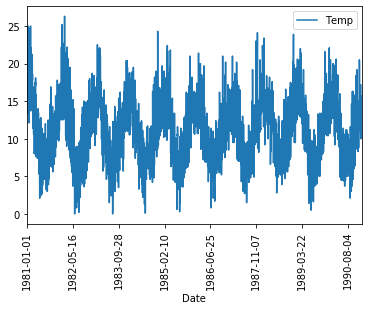

In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import statsmodels

df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv', index_col=0)
df.plot()
plt.xticks(rotation='vertical')
plt.show()

# Split the dataset

Split the dataset into 2 subsets. The first part will be the training dataset that you will use to build an ARIMA model. The second part is the test dataset. It is these time steps that you will treat as out of sample.

Write the code to load the dataset, split it into the training and validation datasets, and save them to files *dataset.csv* and *validation.csv* respectively.


**Instructions**

The dataset contains data from January 1st 1981 to December 31st 1990.
Hold back the last 7 days of the dataset from December 1990 as the test dataset and treat those time steps as out of sample.

Specifically 1990-12-25 to 1990-12-31

In [16]:
split_point = len(df) - 7
dataset, validation = df[0:split_point], df[split_point:]
dataset.to_csv('dataset.csv', index=False)
validation.to_csv('validation.csv', index=False)

# Build the model
Make the data stationary and develop a simple ARIMA model.

The data has a strong seasonal component. You can neutralize this and make the data stationary by taking the seasonal difference. That is, you can take the observation for a day and subtract the observation from the same day one year ago.

This will result in a stationary dataset from which you can fit a model.

The summary of the fit model should look like this:

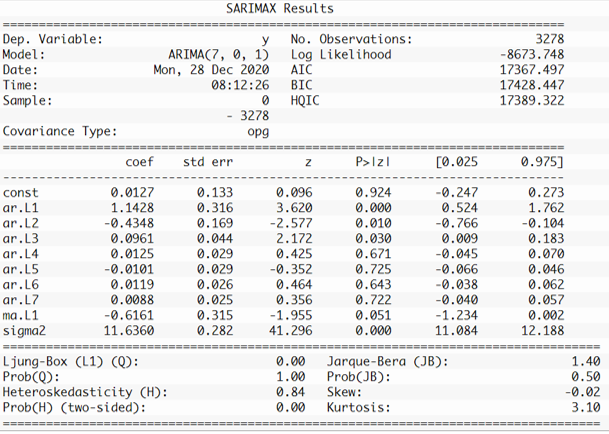

In [17]:
def remove_seasonality(dataset):
    diff = []
    for i in range(365, len(dataset)):
        diff.append(dataset[i] - dataset[i-365])
    return np.array(diff)
 
series = read_csv('dataset.csv', header=0)
X = series.values
model_fit = ARIMA(remove_seasonality(X), order=(7,0,1)).fit()
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 3278
Model:                     ARMA(7, 1)   Log Likelihood               -8673.748
Method:                       css-mle   S.D. of innovations              3.411
Date:                Wed, 27 Oct 2021   AIC                          17367.497
Time:                        14:52:39   BIC                          17428.447
Sample:                             0   HQIC                         17389.322
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0132      0.132      0.099      0.921      -0.246       0.273
ar.L1.y        1.1426      0.287      3.977      0.000       0.580       1.706
ar.L2.y       -0.4347      0.154     -2.830      0.0

# One-step out-of-sample forecast
A one-step forecast is a forecast of the very next time step in the sequence from the available data used to fit the model.

In this case, we are interested in a one-step forecast of Christmas Day 1990: 1990-12-25

**Instructions**
The statsmodel `ARIMAResults` object provides a `forecast()` function for making predictions.

By default, this function makes a single step out-of-sample forecast. As such, you can call it directly and make your forecast. The result of the `forecast()` function is an array containing the forecast value, the standard error of the forecast, and the confidence interval information. You are only interested in the first element of this forecast.

**Expected result: **
`Forecast: 14.861669`

In [18]:
forecast = model_fit.forecast()[0] + X[-365]
print(f'Forecast: {forecast}')

Forecast: [14.86165682]
